# Supervised Machine Learning Algorithms

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False
! pip install mglearn --user
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12,8)
import random
random.seed(21)
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

     |████████████████████████████████| 540 kB 286 kB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=d577bb62bf0c389b718a9dad3f5ff01278c956675a41f6c2098fbe7f6de1ff4e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Some Sample Datasets

An example of a synthetic two-class classification dataset is the forge dataset, which has two features. The following code
creates a scatter plot visualizing all of the data points in this dataset. The plot has the first feature on the x-axis and
the second feature on the y-axis. As is always the case in scatter plots, each data point is represented as one dot. The color and shape of the dot indicates its class:


(26, 2)


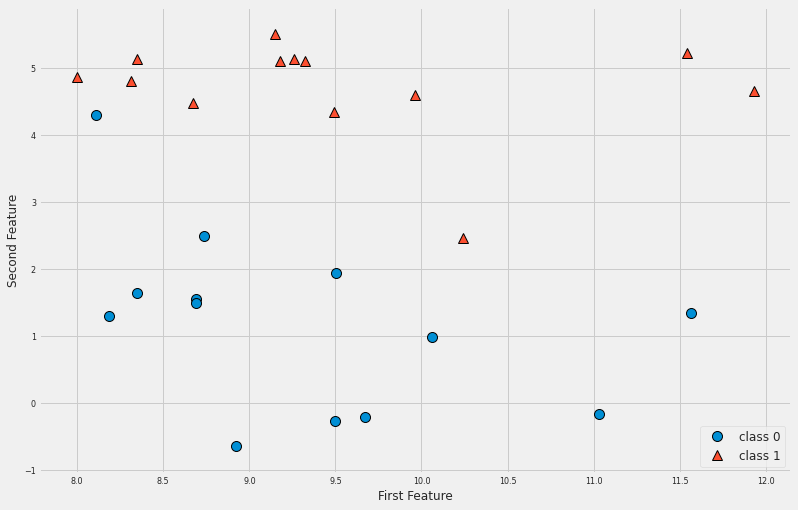

In [2]:
import mglearn 
X ,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0','class 1'],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(X.shape)

As you can see from X.shape, this dataset consists of 26 data points, with 2 features

To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature
and a continuous target variable (or response) that we want to model. The plot created here (Figure 2-3) shows the single
feature on the x-axis and the regression target (the output) on the y-axis:


Text(0, 0.5, 'target')

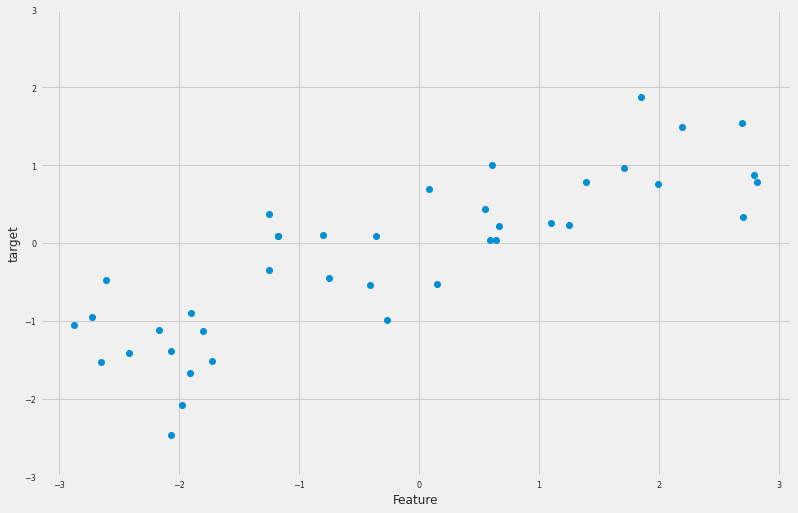

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel("target")

One is the Wisconsin Breast Cancer dataset (cancer,for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue. The data can be loaded using the load_breast_cancer function from scikit-learn:


In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print("Shape of cancer data: {}".format(cancer.data.shape))

print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print("Feature names:\n{}".format(cancer.feature_names))


Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
## Shaping the dataset in form of dataframe
import pandas as pd
import numpy as np
dataframe = pd.DataFrame(np.c_[cancer.data,cancer.target],columns=list(cancer.feature_names)+['target'])
dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0.00
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0.00
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0.00
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0.00
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,0.00
565,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,0.00
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,0.00
567,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,0.00


We will also be using a real-world regression dataset, the Boston Housing dataset. The task associated with this dataset is
to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate,
proximity to the Charles River, highway accessibility, and so on. The dataset contains 506 data points, described by 13 features:

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
## Shaping the dataset in form of dataframe
pd.DataFrame(np.c_[boston.data,boston.target],columns=list(boston.feature_names)+['Target'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features. In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility. Including derived feature like these is called feature engineering. This derived dataset can be loaded using the load_extended_boston function:

In [9]:
X,y = mglearn.datasets.load_extended_boston()
print(X.shape)
print(y.shape)

(506, 104)
(506,)


The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13. We will use these datasets to explain and illustrate the properties of the different machine learning algorithms. But for now, let’s get to the algorithms themselves.

## k-Nearest Neighbors
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training
dataset—its “nearest neighbors.

### k-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. The given figure illustrates this for the case of classification on the forge dataset:

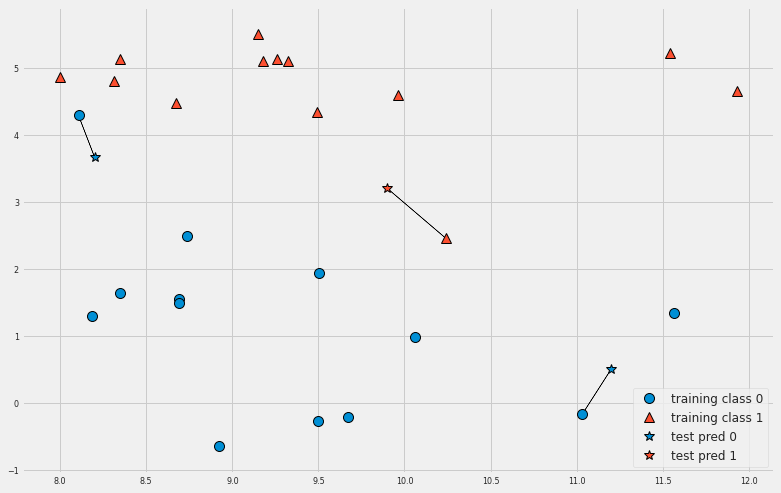

In [10]:
## Analysis the working of this algorithm by changing the n_neighbors parameter 
mglearn.plots.plot_knn_classification(n_neighbors=1)

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance,

In [11]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
print(X_train.shape)

(19, 2)


Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 3:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [14]:
print("{:.3f}".format(knn.score(X_test,y_test)))

0.857


To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [15]:
print(knn.predict(X_test))


[1 0 1 0 1 0 0]


### Analyzing KNeighborsClassifier
For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

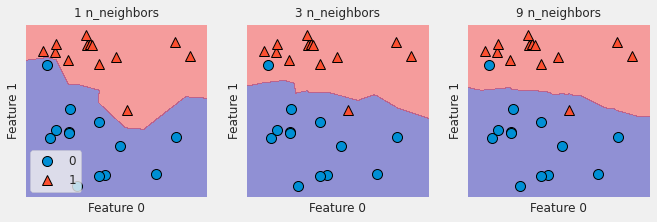

In [16]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbor,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,ax=ax,eps=.5,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} n_neighbors".format(n_neighbor))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
    


As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model complexity. If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

Now, let's apply knn on breast cancer dataset.

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


For k = 1 Training accuracy : 1.000 and Testing accuracy : 0.916
For k = 2 Training accuracy : 0.962 and Testing accuracy : 0.902
For k = 3 Training accuracy : 0.958 and Testing accuracy : 0.923
For k = 4 Training accuracy : 0.948 and Testing accuracy : 0.923
For k = 5 Training accuracy : 0.941 and Testing accuracy : 0.937
For k = 6 Training accuracy : 0.941 and Testing accuracy : 0.923
For k = 7 Training accuracy : 0.939 and Testing accuracy : 0.944
For k = 8 Training accuracy : 0.941 and Testing accuracy : 0.944
For k = 9 Training accuracy : 0.937 and Testing accuracy : 0.958
For k = 10 Training accuracy : 0.937 and Testing accuracy : 0.944


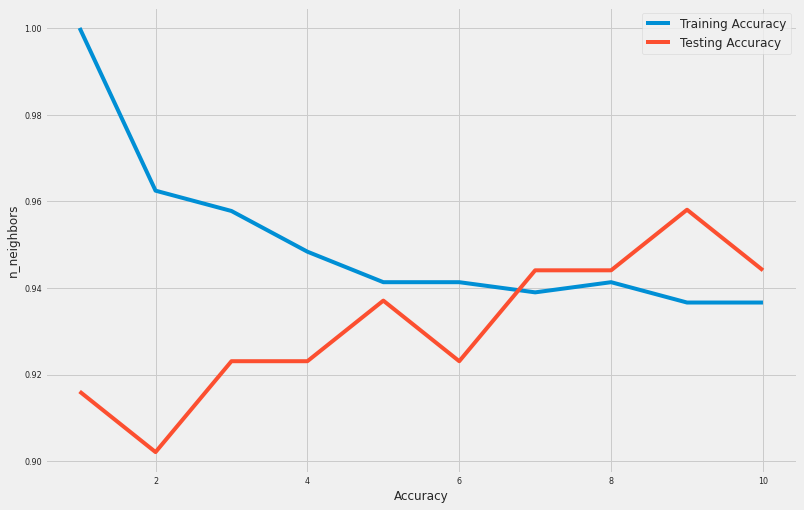

In [19]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    testing_accuracy.append(clf.score(X_test,y_test))
    print("For k = {:.0f} Training accuracy : {:.3f} and Testing accuracy : {:.3f}".format(n_neighbors,clf.score(X_train,y_train),clf.score(X_test,y_test)))
plt.plot(neighbors_settings,training_accuracy,label='Training Accuracy')
plt.plot(neighbors_settings,testing_accuracy,label='Testing Accuracy')
plt.ylabel("n_neighbors")
plt.xlabel("Accuracy")
plt.legend()


## k-neighbors regression

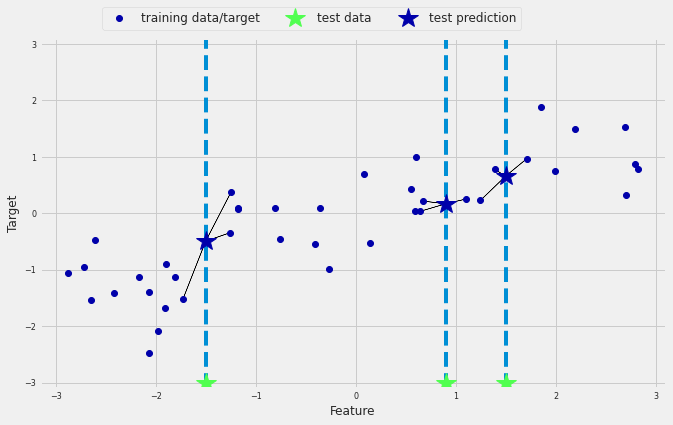

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

This is just the variant of type regression, however the working is same. The prediction is done by averaging the output of k nearst neighbors of the test point.

Let's apply this algorithm on the regression dataset.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("Training Accuracy:",reg.score(X_train,y_train))
print("Testing Accuracy:",reg.score(X_test,y_test))
print("Predictions:",reg.predict(X_test))
print("Original:",y_test)

Training Accuracy: 0.8194343929538755
Testing Accuracy: 0.8344172446249605
Predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Original: [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


### Analyzing KNeighborsRegressor
For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the line:


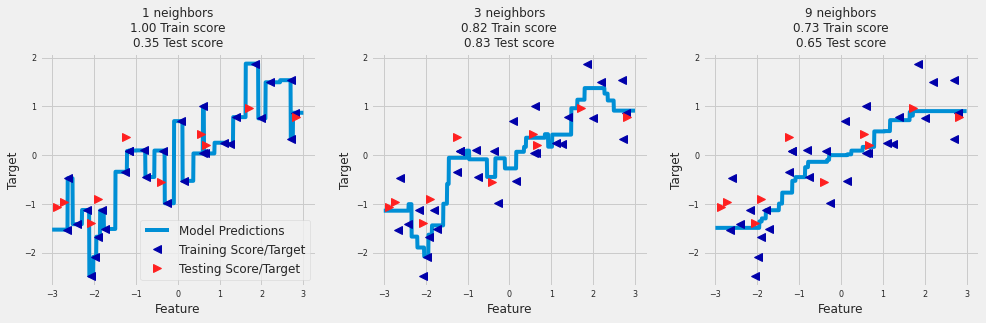

In [22]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'<',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'>',c=mglearn.cm2(1),markersize=8)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.set_title('{} neighbors\n{:.2f} Train score\n{:.2f} Test score'.format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
axes[0].legend(["Model Predictions","Training Score/Target","Testing Score/Target"],loc="best") 

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

## Linear Models

Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a linear function of the input features.

For regression, the general prediction formula for a linear model looks as follows:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, x[0] to x[p] denotes the features (in this example, the number of features is p) of a single data point, w and b are parameters of the model that are learned, and ŷ is the prediction the model makes. 
For a dataset with a single feature, this is:

ŷ = w[0] * x[0] + b

which you might remember from high school mathematics as the equation for a line. Here, w[0] is the slope and b is the y-axis offset.

w[0]: 0.393906  b: -0.031804


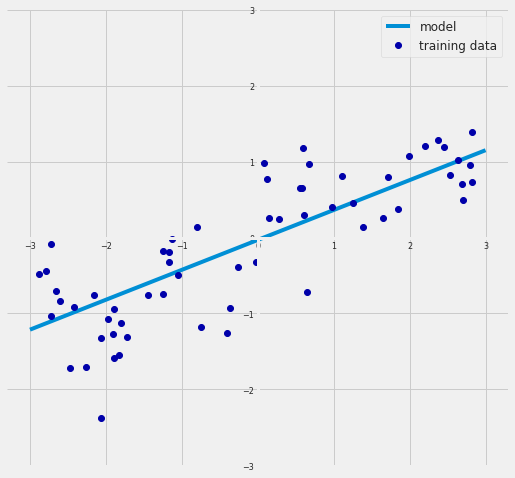

In [23]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression (aka ordinary least squares)

In [24]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(X_train.shape,X_test.shape)
print("Linear Regression slope(w):",linreg.coef_)
print("Linear Regression intercept(b):",linreg.intercept_)
print("Training Score:",linreg.score(X_train,y_train))
print("Testing Score:",linreg.score(X_test,y_test))

(45, 1) (15, 1)
Linear Regression slope(w): [0.39390555]
Linear Regression intercept(b): -0.031804343026759746
Training Score: 0.6700890315075756
Testing Score: 0.65933685968637


An R^2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Let’s take a look at how LinearRegression performs on a more complex dataset, like the Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features. First, we load the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [25]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print("Training Score:",lr.score(X_train,y_train))
print("Testing Score:",lr.score(X_test,y_test))

Training Score: 0.952051960903273
Testing Score: 0.6074721959665876


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.

## Ridge regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.


Let's, Compare coefficient magnitudes for ridge regression with different values of alpha and linear regression.


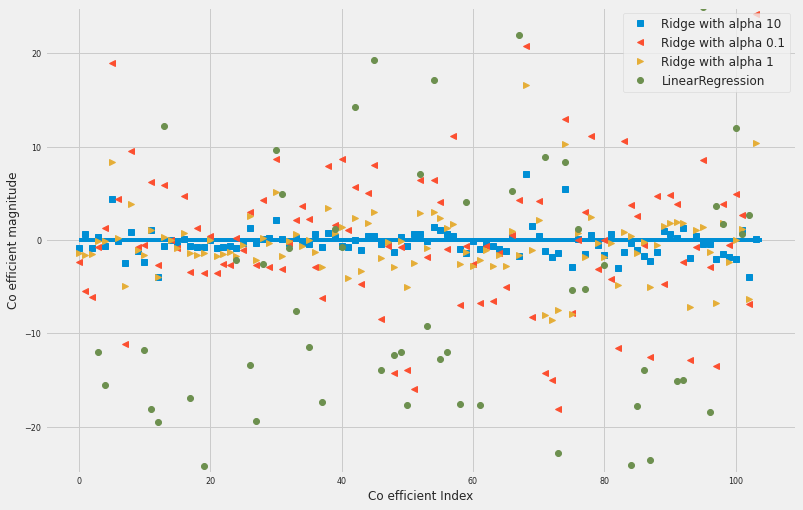

In [27]:
from sklearn.linear_model import Ridge
linrid_1 = Ridge(alpha=10).fit(X_train,y_train)
linrid_2 = Ridge(alpha=0.1).fit(X_train,y_train)
linrid_3 = Ridge(alpha=1).fit(X_train,y_train)


plt.plot(linrid_1.coef_,'s',label='Ridge with alpha 10')
plt.plot(linrid_2.coef_,'<',label='Ridge with alpha 0.1')
plt.plot(linrid_3.coef_,'>',label='Ridge with alpha 1')
plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel("Co efficient Index")
plt.ylabel("Co efficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=100. The y-axis shows the numeric values of the corresponding values of the coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be alpha=0) are so large they are outside of the chart.


Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. For Figure 2-13, we subsampled the Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on subsets of increasing size (plots that show model performance as a function of dataset size are called learning curves):

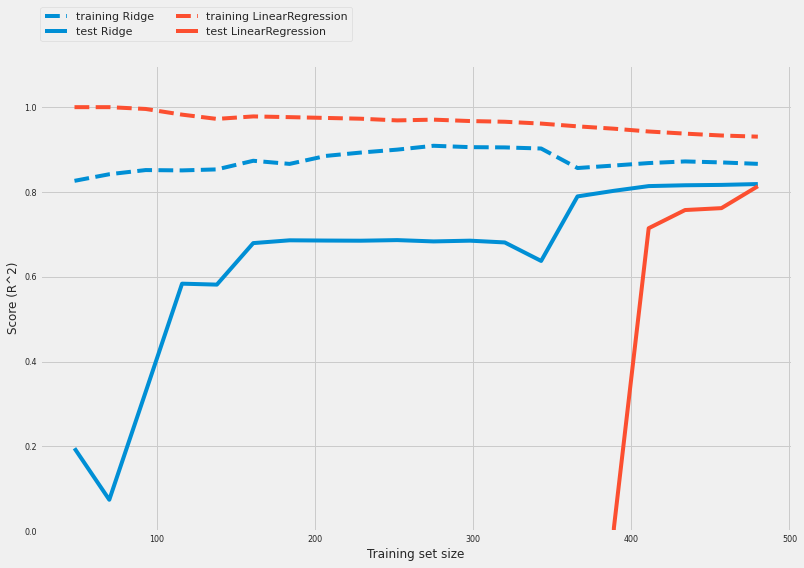

In [28]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance). 

## Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

Let’s apply the lasso to the extended Boston Housing dataset:

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression.


Text(0, 0.5, 'co-efficient magnitude')

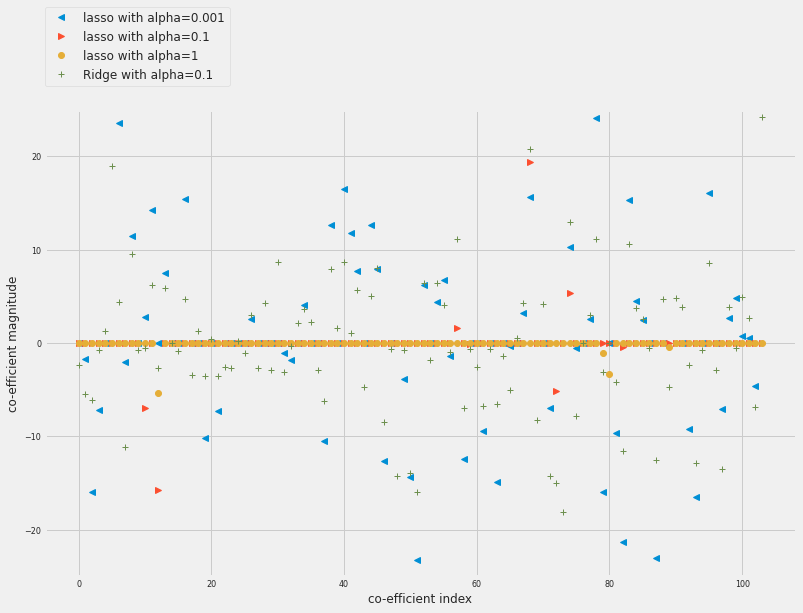

In [30]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.001,max_iter=100000).fit(X_train,y_train)
lasso2 = Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)
lasso3 = Lasso(alpha=1,max_iter=100000).fit(X_train,y_train)
plt.plot(lasso1.coef_,'<',label='lasso with alpha=0.001')
plt.plot(lasso2.coef_,'>',label='lasso with alpha=0.1')
plt.plot(lasso3.coef_,'o',label='lasso with alpha=1')
plt.plot(linrid_2.coef_,'+',label='Ridge with alpha=0.1')
plt.legend(ncol=1,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("co-efficient index")
plt.ylabel("co-efficient magnitude")

For alpha=1, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing alpha to 0.01, we obtain the solution shown as the green dots, which causes most features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. For comparison, the best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

## Linear models for classification - Logistic Regression and Linear SVC


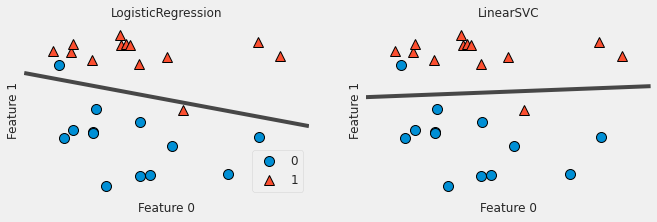

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y = mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LogisticRegression(),LinearSVC()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
           ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
    
    

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the y-axis, as before. We display the decision boundaries found by LinearSVC and LogisticRegression respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom. In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0. The two models come up with similar decision boundaries. Note that both misclassify two of the points.

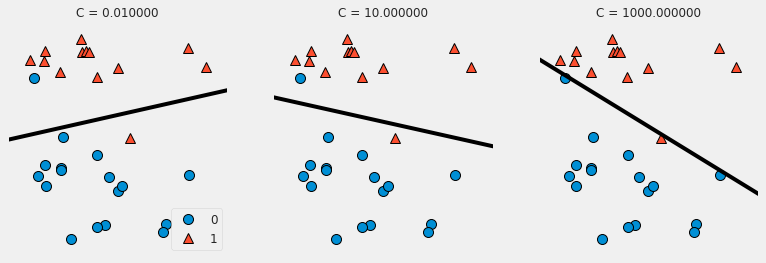

In [32]:
mglearn.plots.plot_linear_svc_regularization()

Let us apply the logistic Regression algorithm to classify the breast cancer dataset.

In [33]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1,solver='liblinear')
logreg.fit(X_train,y_train)
print("Trainig Score:",logreg.score(X_train,y_train))
print("Testing Score:",logreg.score(X_test,y_test))

Trainig Score: 0.9577464788732394
Testing Score: 0.965034965034965


In [34]:
logreg100 = LogisticRegression(C=100,solver='liblinear')
logreg100.fit(X_train,y_train)
print("Training Score:",logreg100.score(X_train,y_train))
print("Testing score:",logreg100.score(X_test,y_test))

Training Score: 0.9765258215962441
Testing score: 0.958041958041958


In [35]:
logreg001 = LogisticRegression(C=0.01,solver='liblinear')
logreg001.fit(X_train,y_train)
print("Training Score:",logreg001.score(X_train,y_train))
print("Testing Score:",logreg001.score(X_test,y_test))

Training Score: 0.9248826291079812
Testing Score: 0.958041958041958


Let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C

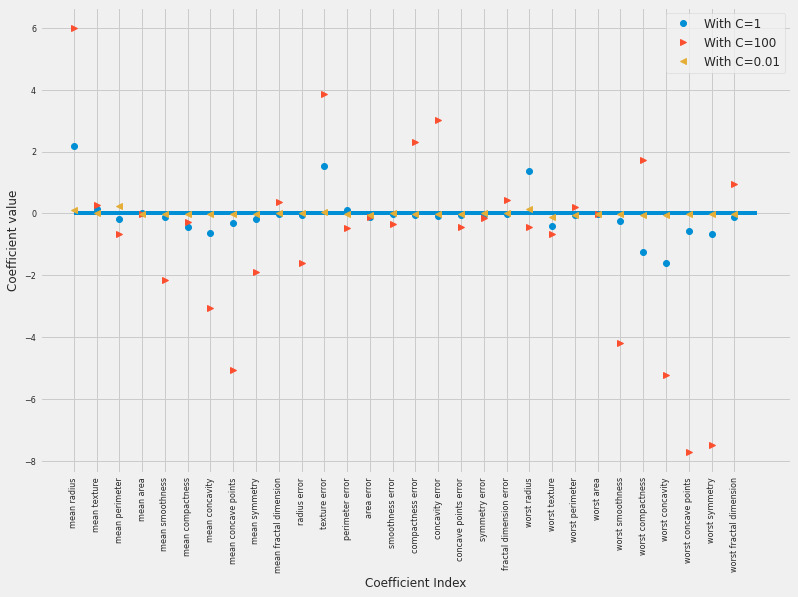

In [36]:
plt.plot(logreg.coef_.T,'o',label="With C=1")
plt.plot(logreg100.coef_.T,'>',label="With C=100")
plt.plot(logreg001.coef_.T,'<',label="With C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient value")
plt.legend()

Training Score with C=0.001 is 0.918
Testing Score with C=0.001 is 0.965
Training Score with C=1 is 0.958
Testing Score with C=1 is 0.965
Training Score with C=100 is 0.977
Testing Score with C=100 is 0.958


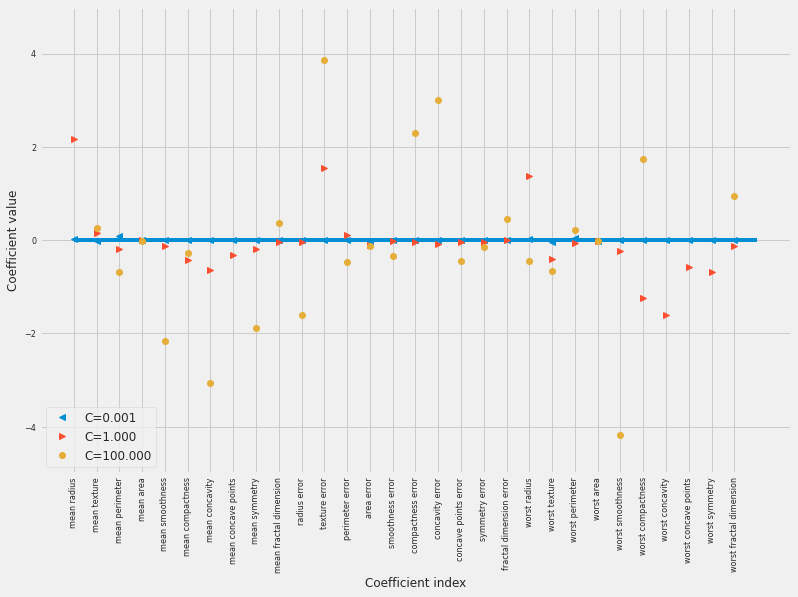

In [37]:
for C,marker in zip([0.001,1,100],['<','>','o']):
    lr_l1 = LogisticRegression(C=C,penalty="l2",solver='liblinear')
    lr_l1.fit(X_train,y_train)
    print("Training Score with C={:} is {:.3f}".format(C,lr_l1.score(X_train,y_train)))
    print("Testing Score with C={:} is {:.3f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,len(cancer.data[1]))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient value")
plt.ylim(-5,5)
plt.legend(loc=3)

## Linear models for multiclass classification

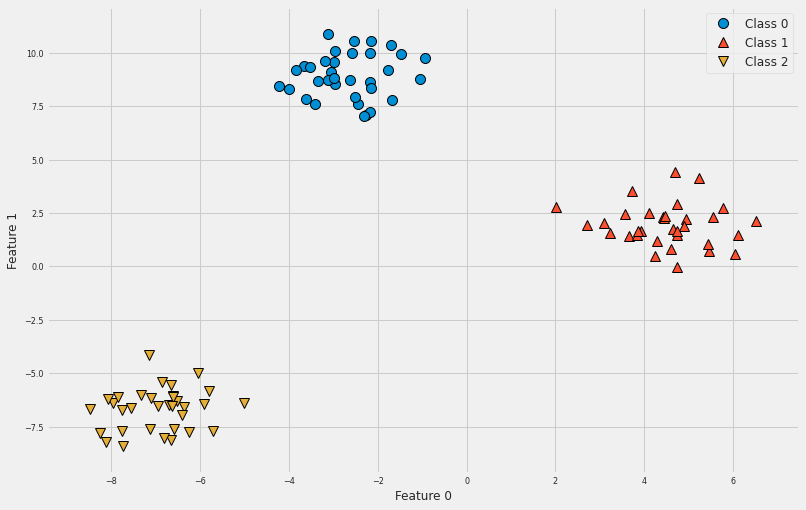

In [38]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

## Linear SVC

In [39]:
linearsvm = LinearSVC().fit(X,y)
print("Coefficient :",linearsvm.coef_)
print("Intercept :",linearsvm.intercept_)

Coefficient : [[-0.17492377  0.2314098 ]
 [ 0.47621579 -0.06937329]
 [-0.18913876 -0.20400555]]
Intercept : [-1.07745252  0.13140163 -0.08604941]


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ conains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers 

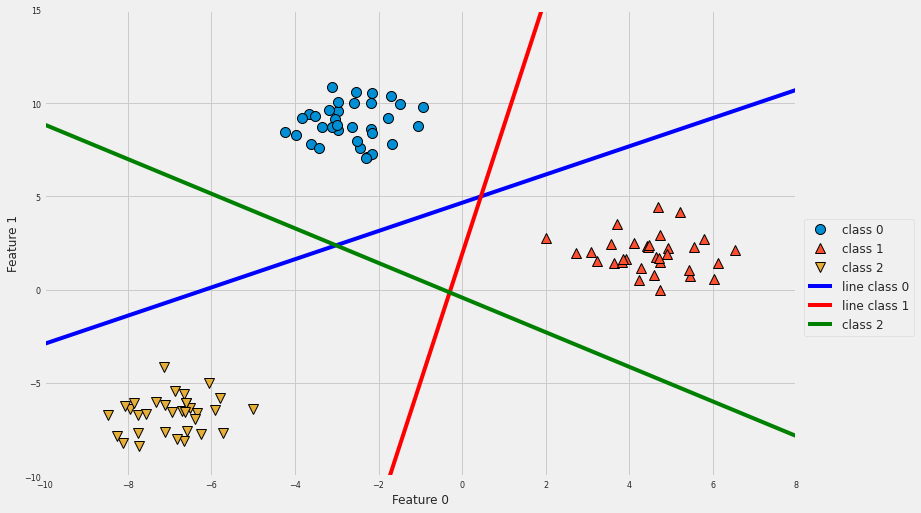

In [40]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linearsvm.coef_,linearsvm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0','class 1','class 2','line class 0','line class 1','class 2'],loc=(1.01,0.3))

You can see that all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes). But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

The following figure shows the predictions for all regions of the 2D space, i.e., multiclass decision boundaries derived from the three one-vs.-rest classifiers

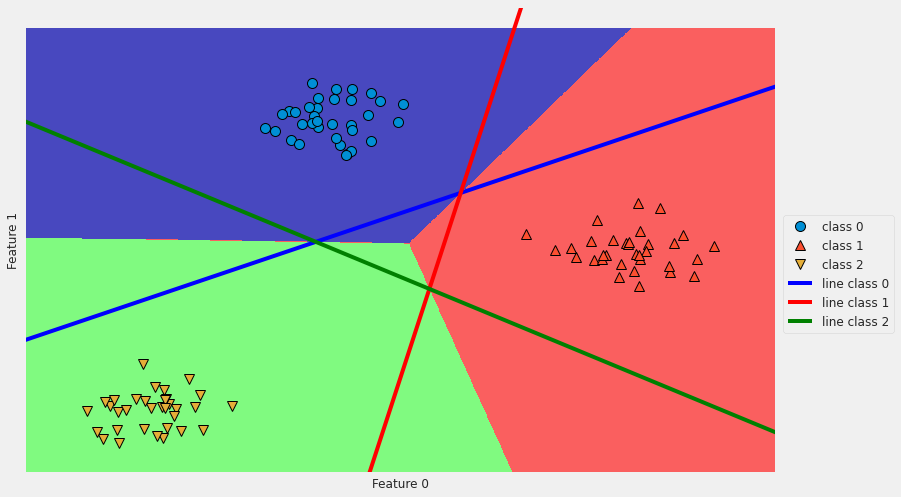

In [41]:
mglearn.plots.plot_2d_classification(linearsvm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linearsvm.coef_,linearsvm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0','class 1','class 2','line class 0','line class 1','line class 2'],loc=(1.01,0.3))

## Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. The top node (also called as root) represents the whole dataset. The recursive partitioning of the data is repeated until each region in the partition only contains a single target value.

For instance, check the decision tree formed for distinguishing several animals. The series of questions can be expressed as a decision tree as shown in figure

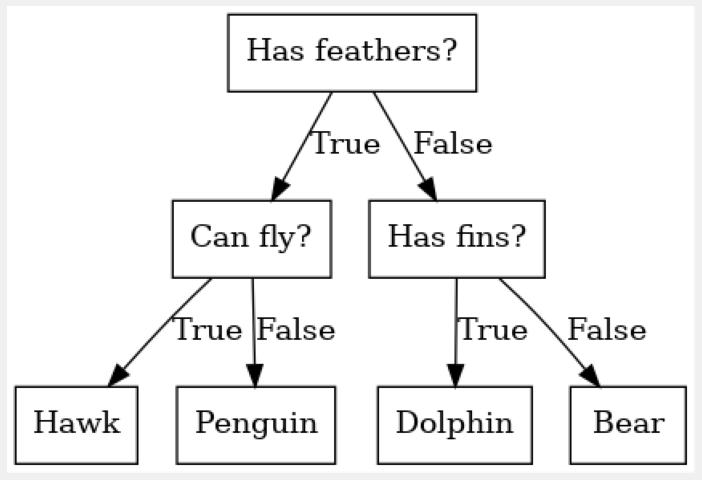

In [42]:
mglearn.plots.plot_animal_tree()

### Analysing Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Training Accuracy {:.3f}".format(tree.score(X_train,y_train)))
print("Testing Accuracy {:.3f}".format(tree.score(X_test,y_test)))


Training Accuracy 1.000
Testing Accuracy 0.937


As you can see from the output of the above cell, the model is overfitting. This is the general problem of the decision trees. However, there are two common strategies to prevent overfitting : Stopping the creation of the tree early **[Pre Prunning]** or building the tree but then after removing or collapsing nodes that contain little information **[Post Prunning]**.

Generally, we apply pre-prunning methods by limiting the maximum depth, limiting the maximum number of leaves or requring a minimum number of points in a node to keep splitting it.

### Visualization of the decision tree built on the Breast Cancer dataset

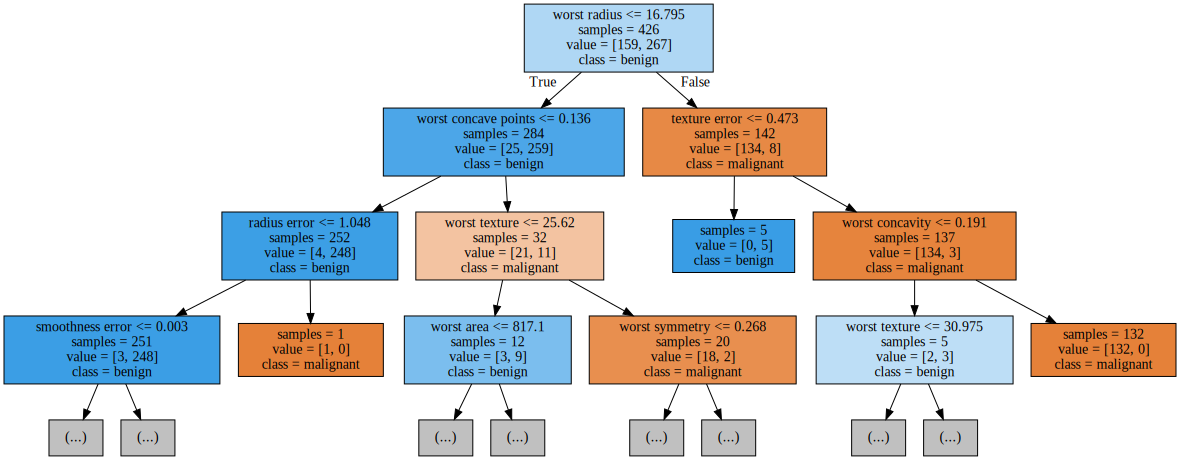

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",max_depth=3, class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [45]:
print("Feature Importances:",tree.feature_importances_)

Feature Importances: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


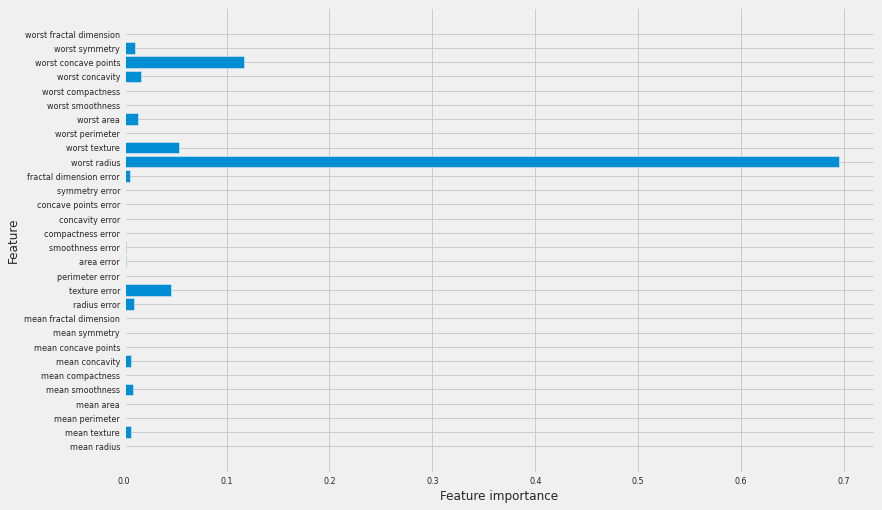

In [46]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)


However, **if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative**. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

### Applying pre-prunning to overcome overfitting

In [47]:
tree = DecisionTreeClassifier(random_state = 0,max_depth = 4)
tree.fit(X_train,y_train)

print("The training accuracy : {:.3f}".format(tree.score(X_train,y_train)))
print("The testing accuracy : {:.3f}".format(tree.score(X_test,y_test)))

The training accuracy : 0.988
The testing accuracy : 0.951


## Ensembles of Decision Trees
Ensembles are methods that combine multiple machine learning models to create more powerful models. There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.

## Random Forest Classifier
As we just observed, a main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees.

To implement this strategy, we need to build many decision trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test. 

To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.



### Analyzing random forests

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=.25,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 0)
clf = RandomForestClassifier(n_estimators=50,random_state=2).fit(x_train,y_train)


The trees that are built as part of the random forest are stored in the n_estimator attribute. Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest.

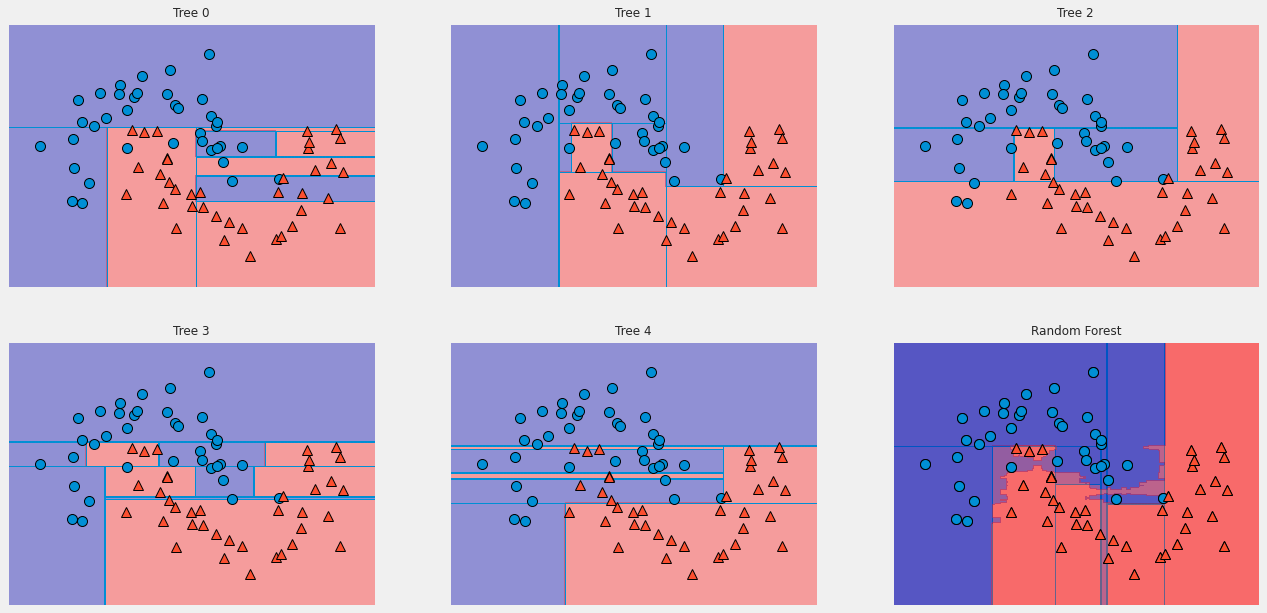

In [49]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),clf.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(clf,x_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
    
    
    

You can clearly see that the decision boundaries learned by the five trees are quite different. Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling. The random forest overfits less than any of the trees individually, and provides a
much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


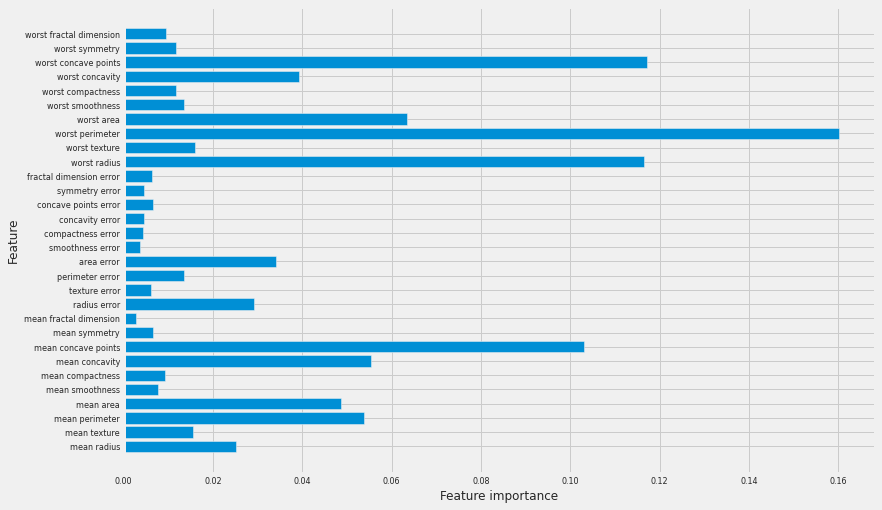

In [51]:
plot_feature_importances_cancer(forest)


## Gradient boosted regression trees (gradient boosting machines)

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate, which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators, also increases the model complexity, as the model has more chances to correct mistakes on the training set. 

Here is an example of using GradientBoostingClassifier on the Breast Cancer dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [53]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [54]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, lowering the maximum depth of the trees provided a significant improvement of the model, while lowering the learning rate only increased the generalization performance slightly.

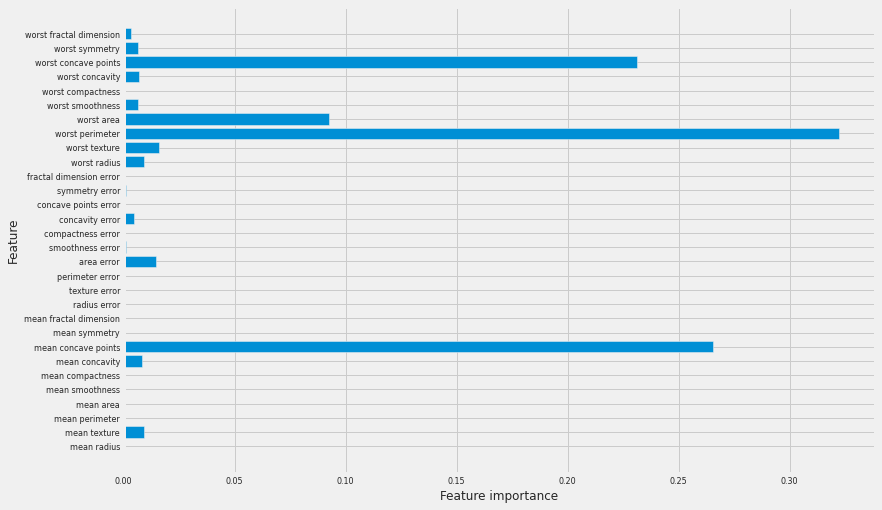

In [55]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.


## Kernelized Support Vector Machines

Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. While there are support vector machines for classification and regression, we will restrict ourselves to the classification case, as implemented in SVC. Similar concepts apply to support vector regression, as implemented in SVR.

Let’s look at the synthetic dataset.

Text(0, 0.5, 'Feature 1')

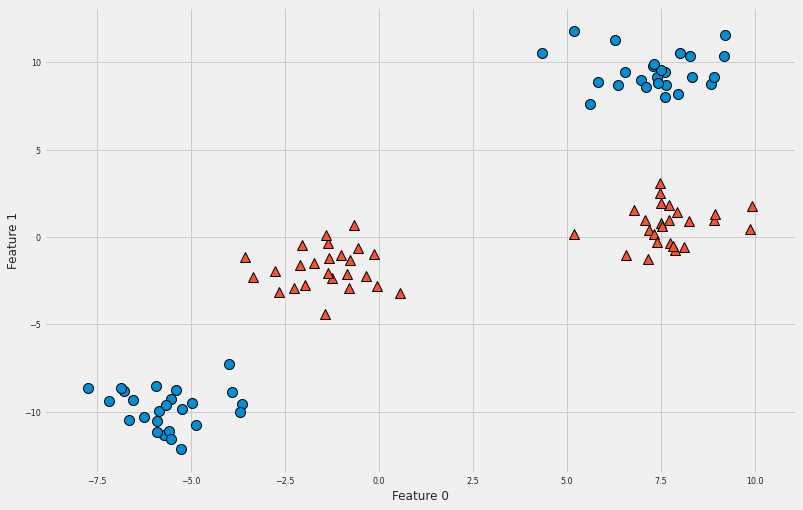

In [56]:
X,y = make_blobs(centers=4,random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

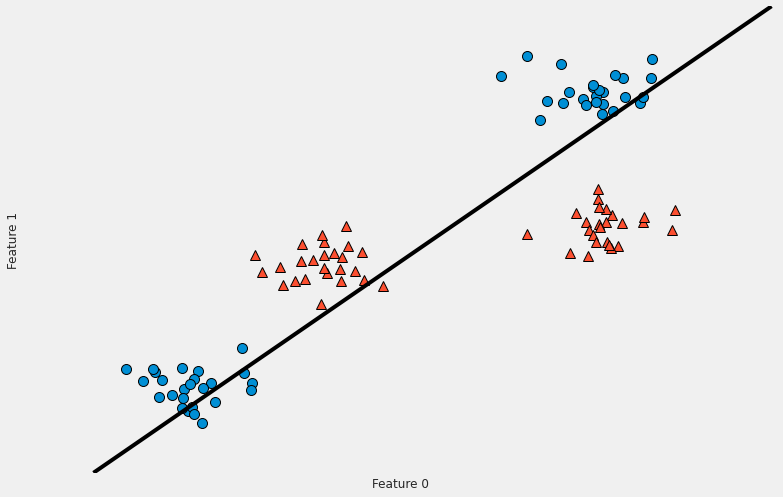

In [57]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svc,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset.

Text(0.5, 0, 'feature1 ** 2')

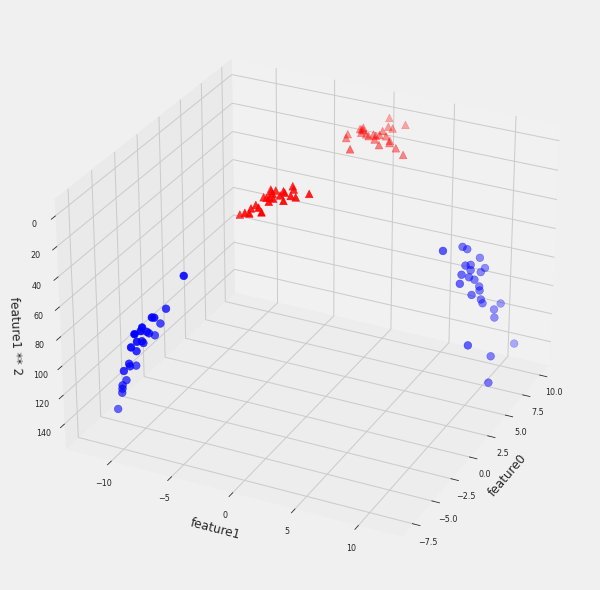

In [58]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

The above plot shows, the Expansion of the dataset shown previously, created by adding a third feature derived from feature1.

In the new representation of the data, it is now indeed possible to separate the two classes using a linear model, a plane in three dimensions. We can confirm this by fitting a linear model to the augmented data.


Text(0.5, 0, 'feature0 ** 2')

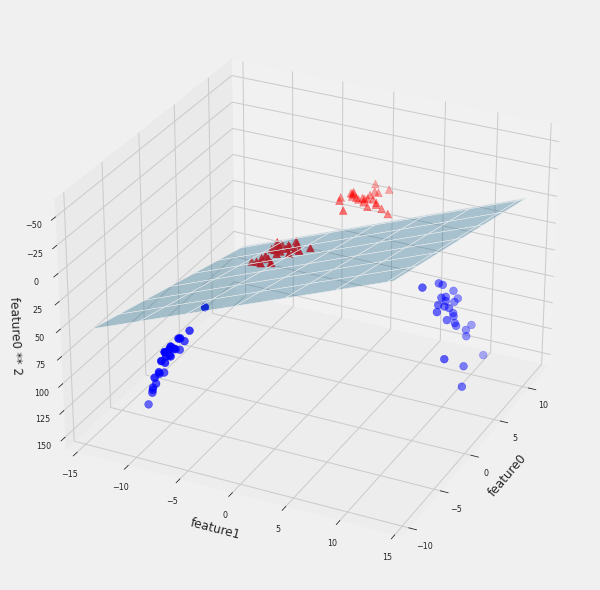

In [59]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse, as you can see from the plot created here.

Text(0, 0.5, 'Feature 1')

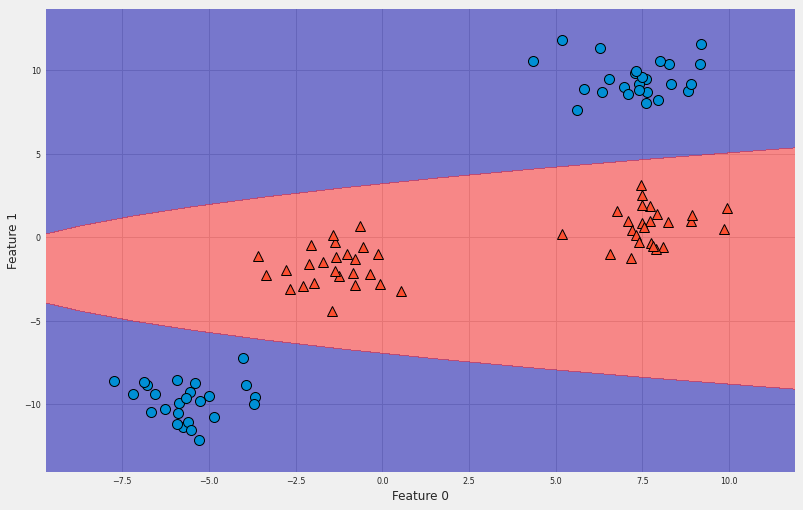

In [60]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### Kernel Trick
The lesson here is that adding nonlinear features to the representation of our data can make linear models much more powerful. There is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional space without actually computing the new, possibly very large representation. This is known as the kernel trick, and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.

There are two ways to map your data into a higher-dimensional space that are commonly used with support vector machines: 

the polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 **2, * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to an infinite-dimensional feature space. 


### Understanding SVMs
During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called support vectors and give the support vector machine its name.
To make a prediction for a new point, the distance to each of the support vectors is measured. A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training (stored in the dual_coef_ attribute of SVC).

The distance between data points is measured by the Gaussian kernel:

k_rbf(x1, x2) = exp(ɣ(ǁx1 - x2ǁ)^2)

Here, x1 and x2 are data points, ǁ x1 - x2 ǁ denotes Euclidean distance, and ɣ (gamma) is a parameter that controls the width of the Gaussian kernel.


Text(0, 0.5, 'Feature 1')

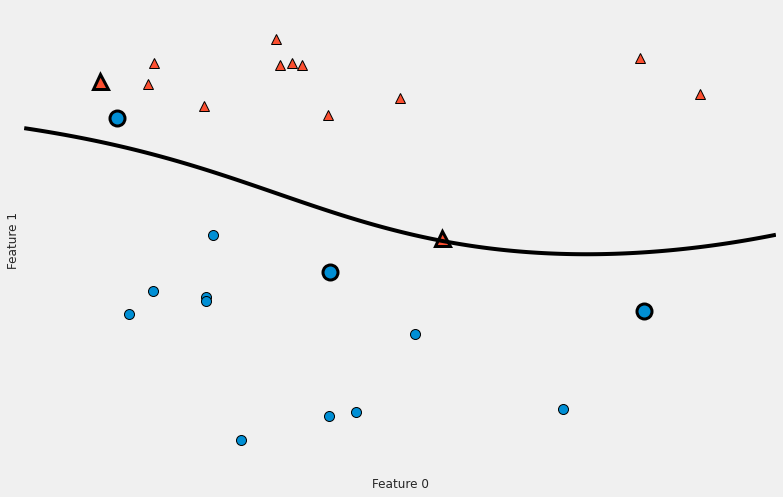

In [61]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf',C =10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In this case, the SVM yields a very smooth and nonlinear (not a straight line) boundary. We adjusted two parameters here: the C parameter and the gamma parameter, which we will now discuss in detail.

### Tuning SVM parameters

In [62]:
!pip install xgboost
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

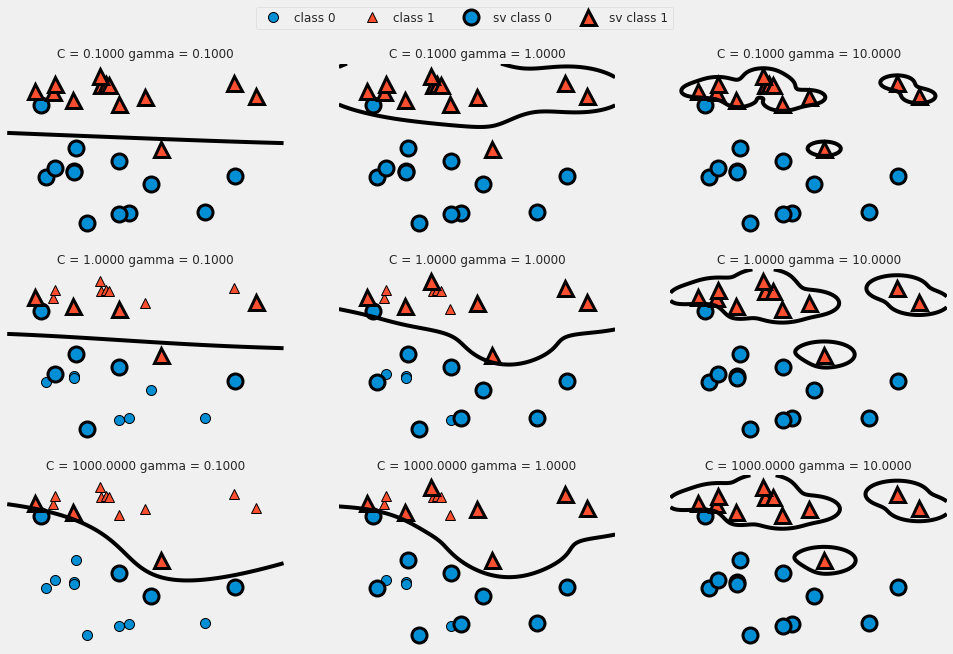

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
     for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
 ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10. A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right. A low value of gamma means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of gamma yields a more complex model. Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the linear models, a small C means a very restricted model, where each data point can only have very limited influence. You can see that at the top left the decision boundary looks nearly linear, with the misclassified points barely having any influence on the line. Increasing C, as shown on the bottom right, allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.

Let’s apply the RBF kernel SVM to the Breast Cancer dataset. By default, C=1 and gamma=1/n_features:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.90
Accuracy on test set: 0.94


SVMs often perform quite well, they are very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale.

Let’s look at the minimum and maximum values for each feature, plotted in log-space.

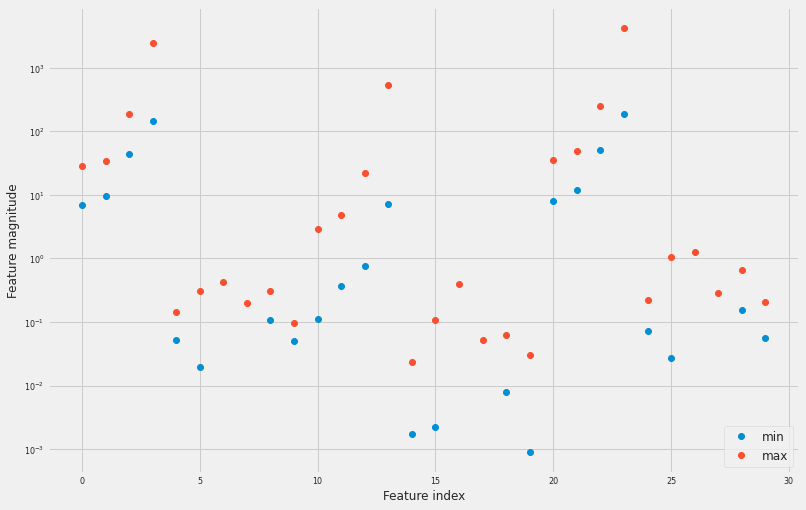

In [65]:
plt.plot(X_train.min(axis=0),'o',label='min')
plt.plot(X_train.max(axis=0),'o',label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [66]:
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [67]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.984
Accuracy on test set: 0.972


## Neural Networks (Deep Learning)


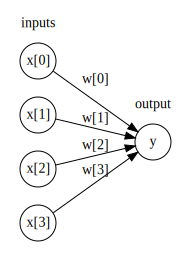

In [68]:
display(mglearn.plots.plot_logistic_regression_graph())

### Multilayer perceptrons
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

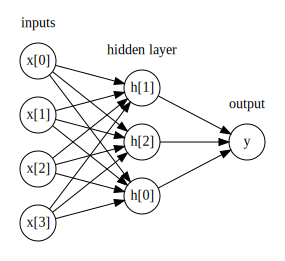

In [69]:
display(mglearn.plots.plot_single_hidden_layer_graph())

After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result—usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of this function is then used in the weighted sum that computes the output, ŷ.

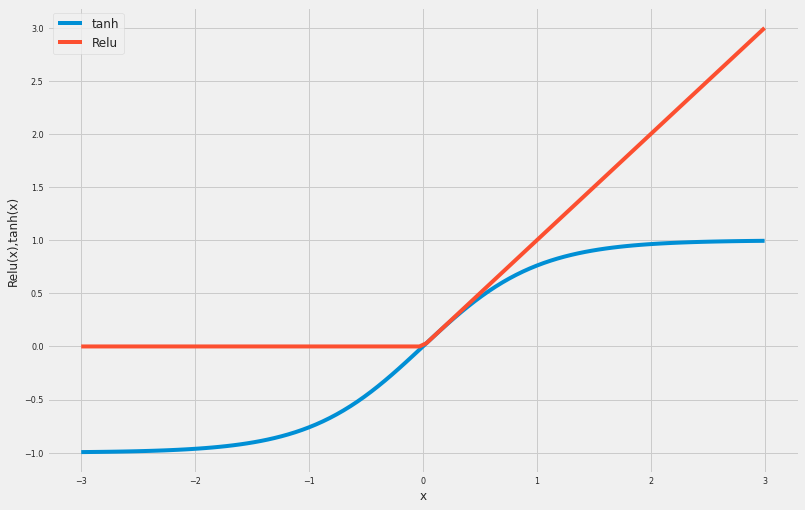

In [70]:
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(0,line),label='Relu')
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("Relu(x),tanh(x)")
plt.show()

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
print(X.shape,y.shape)
#MLPClassifier?

(100, 2) (100,)


Training Accuracy :  1.0
Testing Accuracy :  0.88


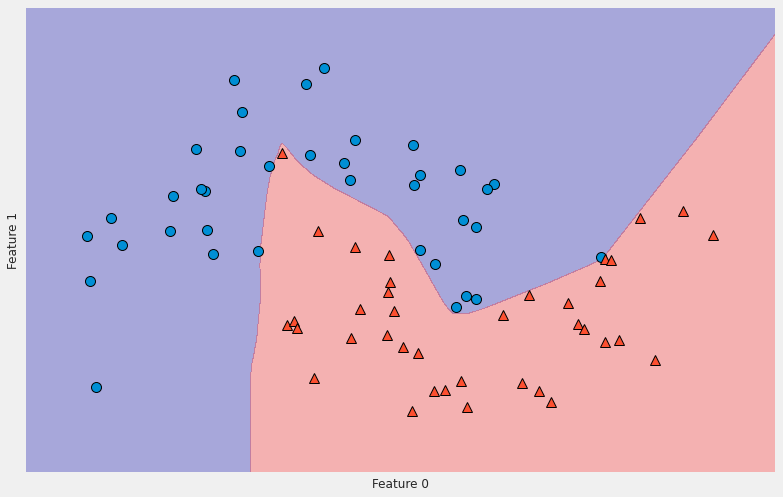

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Training Accuracy : ",mlp.score(X_train,y_train))
print("Testing Accuracy : ",mlp.score(X_test,y_test))

In [73]:
print(cancer.target.shape)
print(cancer.data.shape)

(569,)
(569, 30)


In [74]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [76]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(max_iter =1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.97


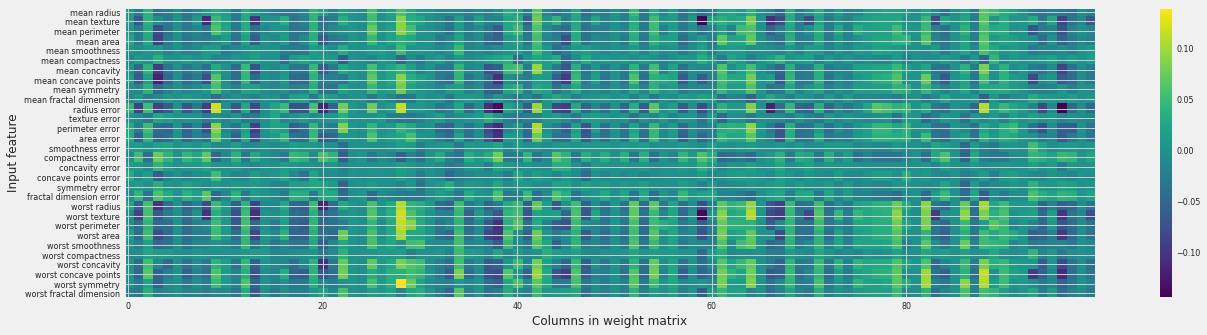

In [77]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

If you have any doubts or any suggestions about this notebook, comment in the comment section, I will surely reach to you.
Refrences has been taken from O'Reilly's text book **Introduction to Machine Learning with Python** and all credit goes to authors of the book **Andreas C. Müller & Sarah Guido**. I am really thankful to learn these fundamental concepts from this book and this helped alot.

## Hope you guys enjoyed....!!!!